In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy.stats import skew

In [2]:
df = pd.read_csv("train.csv", delimiter=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Detail Column Descriptions\
Bank Client Data

Age : umur customer\
Job : pekerjaan customer\
marital : status customer\
education : jenjang pendidikan
- unknown = tidak di ketahui
- secondary = tingkat pendidikan menengah(SMA ata setara)
- primary = tingkat pendidikan dasar(sd atau setara)
- Tertiary = tingkat pendidikan tinggi(univesitas atau setara)\

default : pernah gagal bayar atau tidak?\
balance : rata-rata gaji pertahun in euro\
housing : ada pinjaman bank rumah?\
loan : ada pinjaman pribadi?

### berkaitan dengan kontak terakhir dari campaign yang sekarang

contact : di hubungi lewat apa\
day : hari terakhir di kontak dalam sebulan\
month : bulan terakhir di kontak dalam setahun\
duration : durasi telpon terakhir di kontak dalam detik\

### atribut lainnya
campaign : jumlah kontak yang dilakukan selama kampanye ini\
pdays : jumlah hari yang berlalu setelah klien terakhir di hubungi(-1 berarti customer belum pernah di hubungi)\
previous : jumlah kontak yang dilakukan sebelum campaign berlangsung\
poutcome : hasil dari campaign sebelumnya

### output variable
y : apakah client memutuskan untuk berlangganan?




# Descriptive Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Bivariate Analysis

In [4]:
numeric = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']
categoric = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

In [5]:
df[numeric].describe()

,age,balance,duration,campaign,pdays,previous,day
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323,15.806419
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441,8.322476
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000,8.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000,16.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000,21.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000,31.000000


In [6]:
display(df[numeric].age.mean(),
        df[numeric].age.median()
)

40.93621021432837

39.0

Melihat distribusi secara sekilas

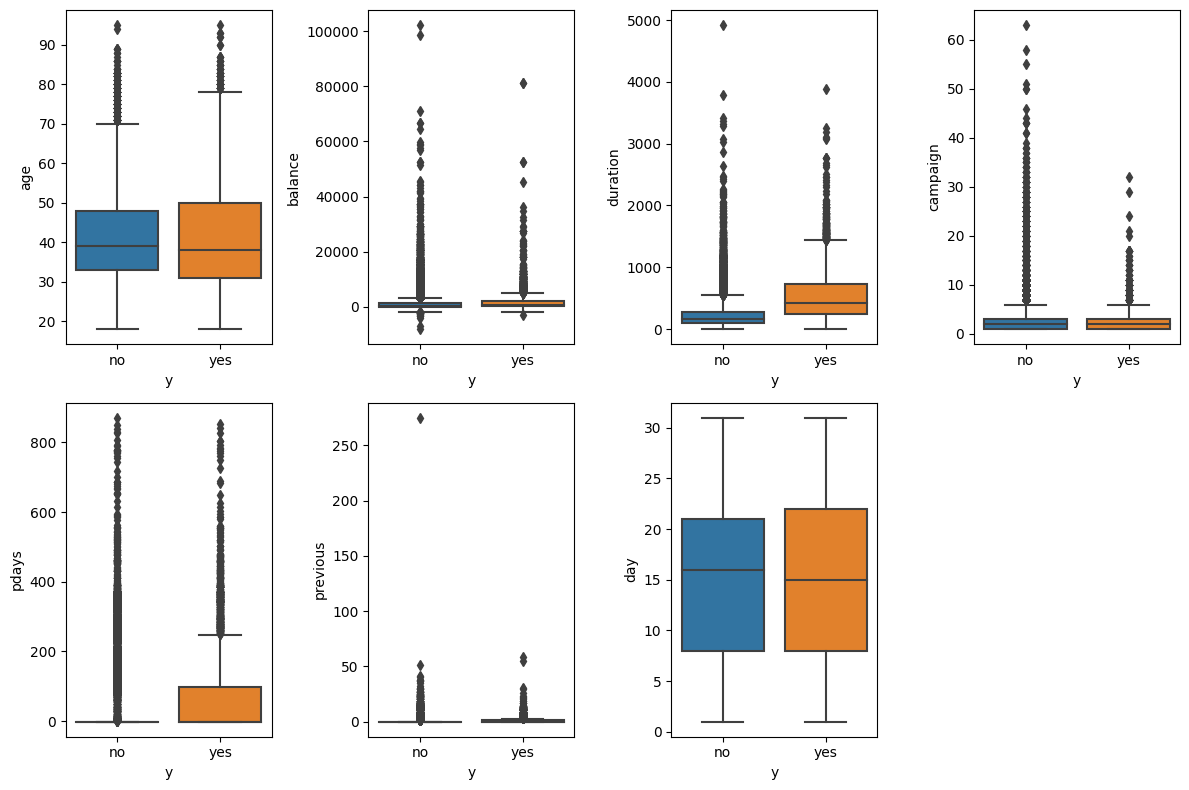

In [13]:
plt.figure(figsize = (12,8))
for i in range(0, len(numeric)):
  plt.subplot(2, 4, i+1)
  sns.boxplot(y = df[numeric[i]], x = df['y'], orient = 'v')
  plt.tight_layout()

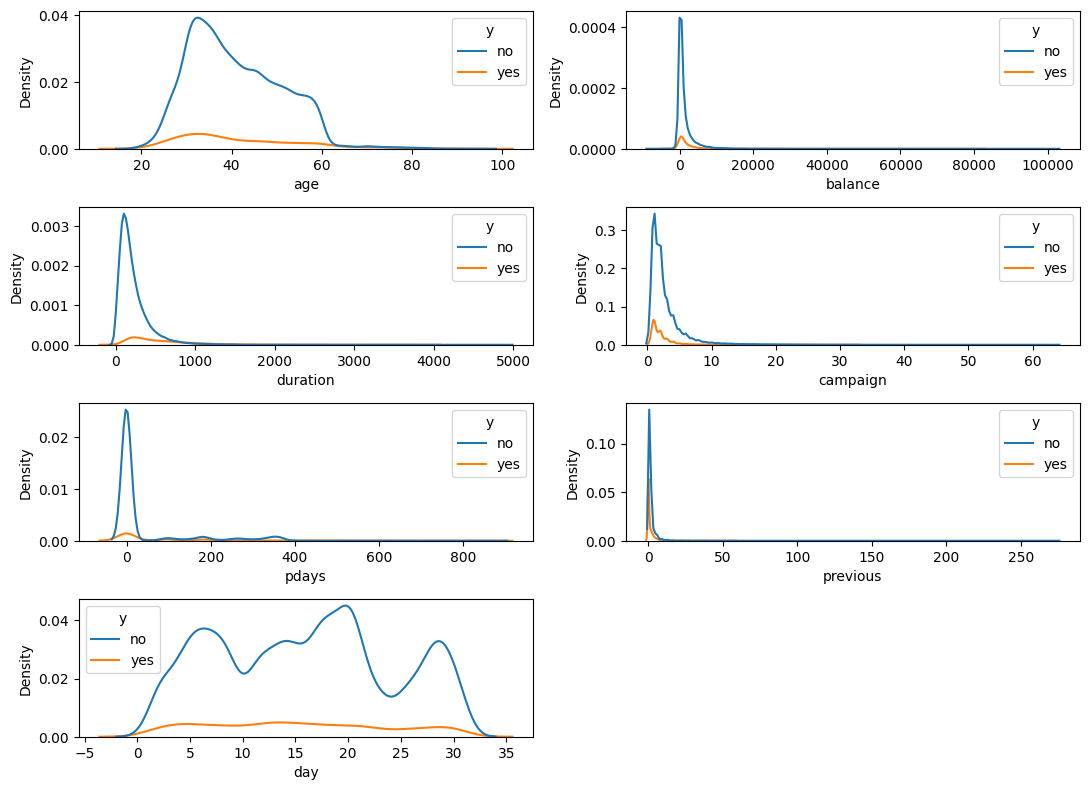

In [14]:
plt.figure(figsize=(11,8))
for i in range(0, len(numeric)):
  plt.subplot(4, 2, i+1)
  sns.kdeplot(x = df[numeric[i]], hue = df['y'])
  plt.tight_layout()

dari hasil overview diatas, terlihat cukup banyak data yang memiliki outlier dan tidak terdistribusi secara normal

Skew berdasarkan Fisher-Pearson coefficient sebesar :  0.6847952047866451 itu menandakan bahwa data skew positive
lalu jika dilihat dari mean dan mean nya sebesar : 
 mean :  40.93621021432837 
 median :  39.0
mean > median, artinya data terdistribusi positive


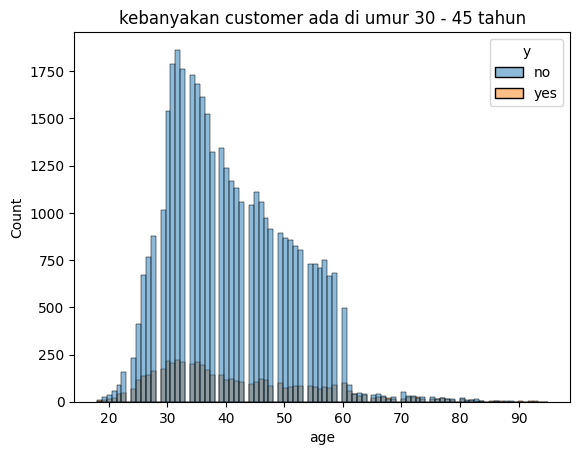

In [19]:
sns.histplot(x = df['age'], hue = df['y'])
plt.title('kebanyakan customer ada di umur 30 - 45 tahun')
print("Skew berdasarkan Fisher-Pearson coefficient sebesar : ", skew(df['age']), 'itu menandakan bahwa data skew positive')
print("lalu jika dilihat dari mean dan mean nya sebesar : \n", "mean : ",df[numeric].age.mean(),
        "\n median : ", df[numeric].age.median()
)
print("mean > median, artinya data terdistribusi positive")

distribusi dari kolom age terlihat positively skew\
rentang umur customer yang paling banyak ada di antara 30 - 45 tahun\

banyak customer yang melakukan deposito berasal dari umur 25 - 60 tahun\
sisi paling menarik, customer dengan umur diatas 60 tahun mayoritas melakukan deposito

(0.0, 3000.0)

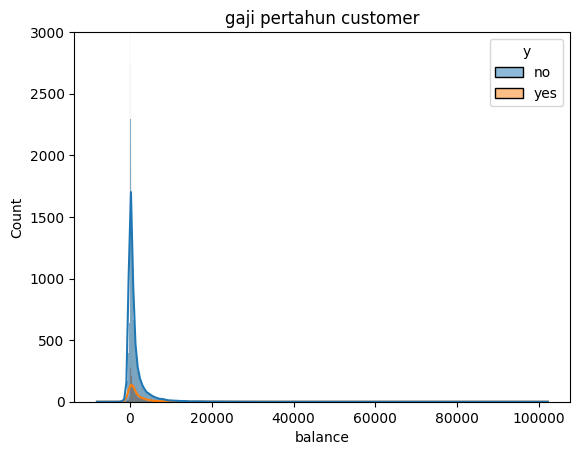

In [20]:
sns.histplot(x = df['balance'], hue = df['y'], kde = True)
plt.title("gaji pertahun customer")
plt.ylim(0,3000)

gaji orang yang minus itu ada 8% dari keseluruhan data
dan orang yang melakukan deposito juga berasal dari kalangan yang memiliki gaji dibawah 10000

In [ ]:
(df[df['balance'] < 0].shape[0] / df.shape[0]) * 100

8.329831235761208

In [ ]:
(df[df['balance'] > 0].shape[0] / df.shape[0]) *100

83.89772400521997

ternyata banyak customer yang tidak memiliki gaji, alias pengangguran\
distribusi nya menujukan positive skew yang sangat parah

**coba dilihat hubungan antara balance dengan y**

In [ ]:
df['duration'].median()

180.0

In [54]:
df[df['y']== 'yes']['duration'].value_counts().to_frame().describe()

,duration
count,1337.000000
mean,3.955871
std,3.146426
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,19.000000


3 menit orang di telpon

Text(0.5, 1.0, 'durasi telepon customer dalam detik')

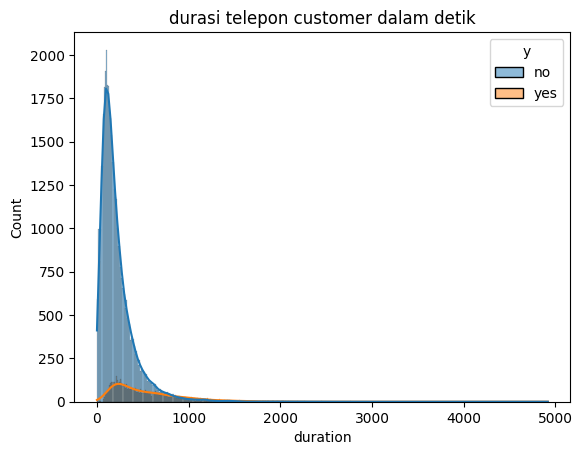

In [21]:
sns.histplot(x = df['duration'], hue = df['y'], kde = True)
plt.title("durasi telepon customer dalam detik")

banyak customer yang melakukan telepon dengan durasi yang panjang malah tidak melakukan deposito, tetapi jika kita lihat untuk yang melakukan deposito durasi telepon nya cenderung sebentar\
ini menandakan bahwa customer yang melakukan deposito memang sudah tertarik dengan campaign yang di tawarkan

In [ ]:
df['campaign'].value_counts().head()

1    17544
2    12505
3     5521
4     3522
5     1764
Name: campaign, dtype: int64

In [ ]:
df['y'].value_counts(normalize = True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

Text(0.5, 1.0, 'jumlah kontak yang dilakukan pada setiap kampanye')

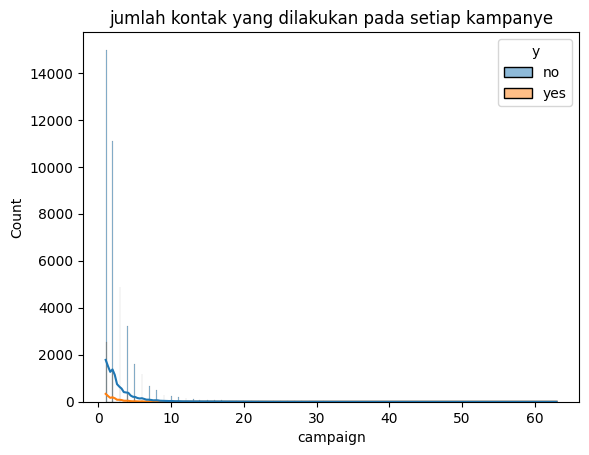

In [22]:
sns.histplot(x = df['campaign'], hue = df['y'], kde = True)
plt.title('jumlah kontak yang dilakukan pada setiap kampanye')

dari hasil visualisasi terlihat bahwa banyak orang yang di kontak ditawarkan dengan kampanye 1 dan 2\
tetapi sedikit sekali dari mereka yang melakukan deposito

In [ ]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

(-10.0, 400.0)

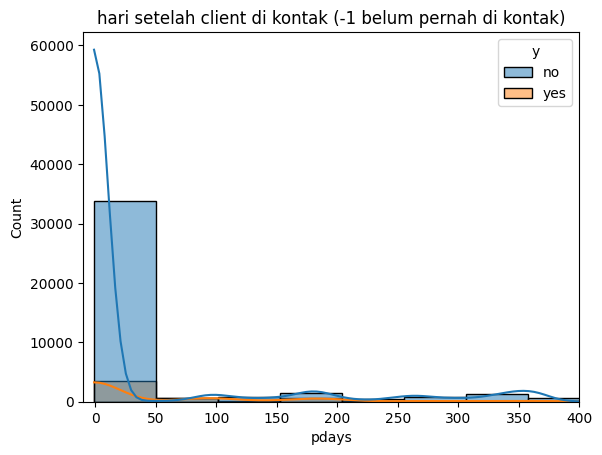

In [23]:
sns.histplot(x = df['pdays'], hue = df['y'], kde = True)
plt.title("hari setelah client di kontak (-1 belum pernah di kontak)")
plt.xlim(-10,400)

dari hasil visualisasi tersebut ternyata banyak sekali customer yang belum pernah di kontak sebelumnya, dan kebanyakan dari mereka tidak tertarik untuk melakukan deposito.\

Text(0.5, 1.0, 'kontak yang dilakukan sebelum campaign berlangsung')

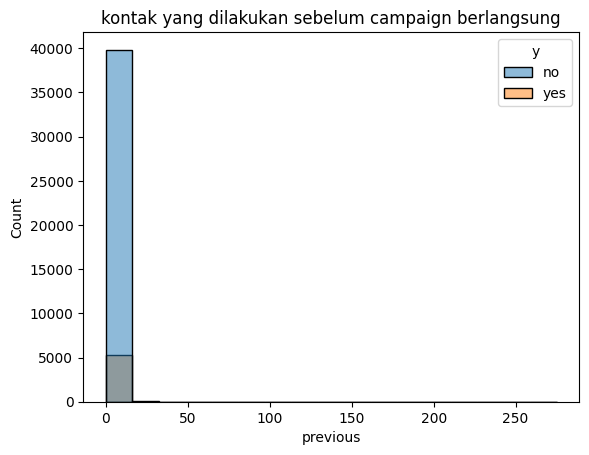

In [24]:
sns.histplot(x = df['previous'], hue = df['y'])
plt.title("kontak yang dilakukan sebelum campaign berlangsung")

banyak orang yang tidak di kontak sebelum campaign nya berlangsung, ini menandakan bahwa bank ini tidak mengetahui target yang ingin diberikan penawaran
**edit : bandingkan dengan y(nanti)**

Text(0.5, 1.0, 'hari kontak terakhir setiap bulan')

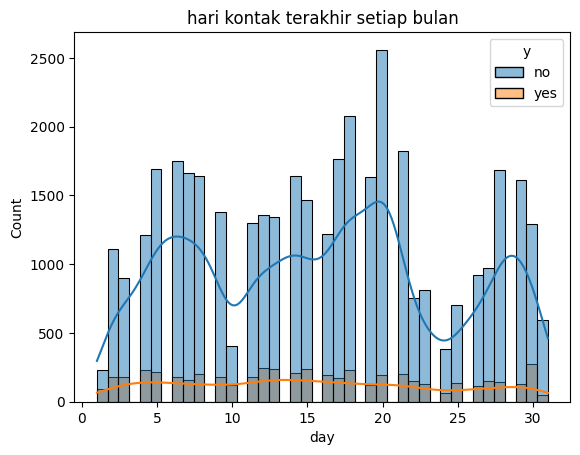

In [25]:
sns.histplot(x = df['day'], hue = df['y'], kde = True)
plt.title("hari kontak terakhir setiap bulan")

distribusi menunjukan type bimodal, dimana distribusi terbagi menjadi tiga puncak.
menarik nya customer yang melakukan deposito terlihat cukup stabil di hari apapun, ini artinya tidak ada hari yang terbaik untuk melakukan deposito

(-10.0, 50.0)

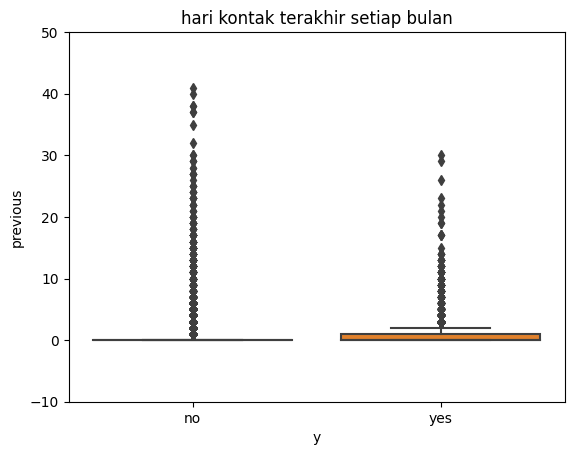

In [ ]:
sns.boxplot(y = 'previous', x = 'y', data = df)
plt.title("hari kontak terakhir setiap bulan")
plt.ylim(-10,50)

<Axes: xlabel='default', ylabel='count'>

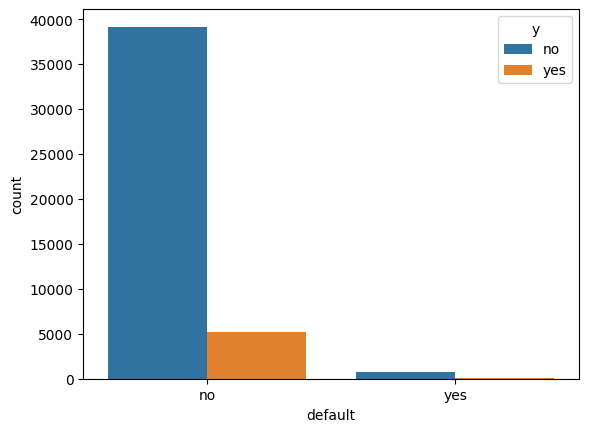

In [55]:
sns.countplot(x = 'default', data = df, hue = 'y')

Banyak dari customer yang tidak memiliki indikasi Gagal Bayar, hal ini menandakan customer termasuk kedalam tipe yang aman.\
dan juga sekitar 5000 customer yang tidak terindiskasi gagal bayar melakukan deposito

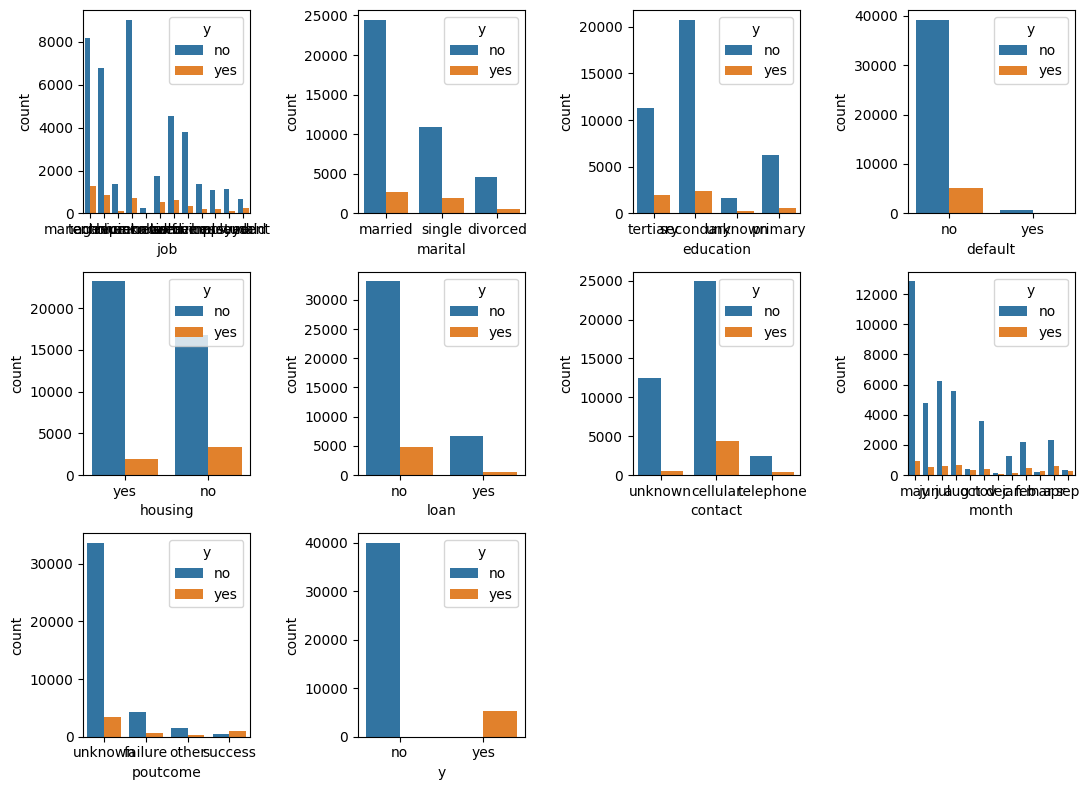

In [28]:
plt.figure(figsize = (11,8))
for i in range(0, len(categoric)):
  plt.subplot(3, 4, i+1)
  sns.countplot(x = df[categoric[i]], hue = df['y'])
  plt.tight_layout()

penampakan sekilas dari tiap chart

In [ ]:
total_data = len(df[categoric].job)
total_data

45211

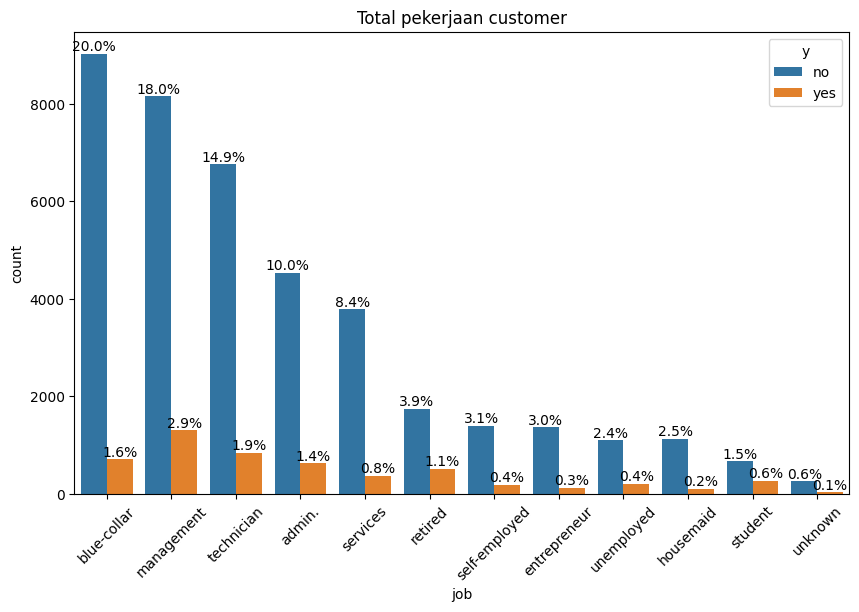

In [30]:
plt.figure(figsize=(10,6))
total_data = len(df[categoric].job)
sorted_counts = df[categoric].job.value_counts()
ax = sns.countplot(x = df[categoric].job, order = sorted_counts.index, hue = df['y'])
plt.title("Total pekerjaan customer")
plt.xticks(rotation = 45)

for i in ax.patches:
  percentage = '{:.1f}%'.format(100 * i.get_height() / total_data)
  x = i.get_x() + i.get_width() / 2
  y = i.get_height()
  ax.annotate(percentage, (x,y), ha = 'center', va = 'bottom')
plt.show()

pekerjaan para customer kebanyakan adalah blue-collar, management, technician, admin, services\n sebaiknya kita menyasar kepada customer dengan pekerjaan tersebut\
tetapi customer dengan pekerjaan management, technician, admin, dan bahkan retired lebih banyak melakukan deposito dibandingkan pekerjaan yang lain

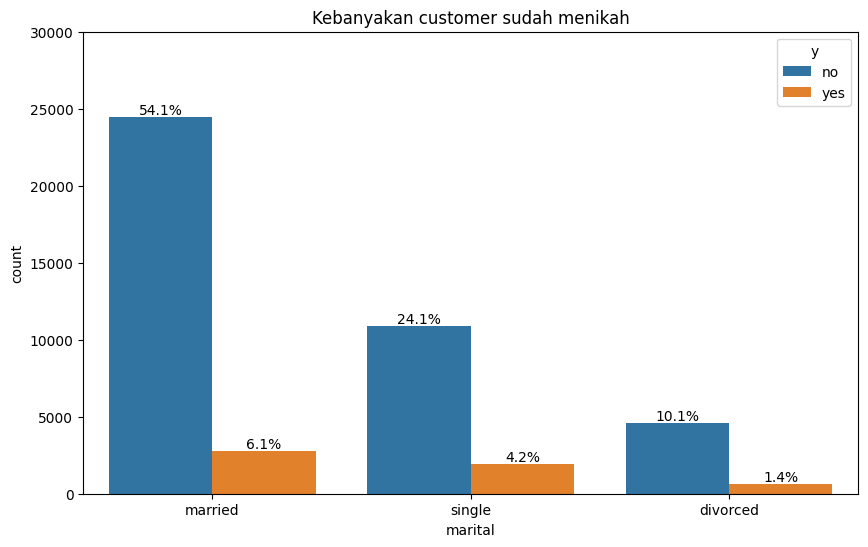

In [32]:
plt.figure(figsize=(10,6))
total_data = len(df['marital'])
sorted_value = df['marital'].value_counts()
ax = sns.countplot(data = df, x = 'marital', order = sorted_value.index, hue = 'y')
plt.title("Kebanyakan customer sudah menikah")

plt.ylim(0 , 30000)
for i in ax.patches:
  percentage = '{:.1f}%'.format(100 * i.get_height() / total_data)
  x = i.get_x() + i.get_width() / 2
  y = i.get_height()
  ax.annotate(percentage, (x,y), ha = 'center', va = 'bottom')
plt.show()
plt.show()

kebanyakan dari customer sudah menikah
customer yang melakukan deposito kebanyakan dari yang sudah menikah dan masih single, tapi jika dilihat secara populasi sepertinya customer yang masih single memilki potensi lebih untuk melakukan deposito

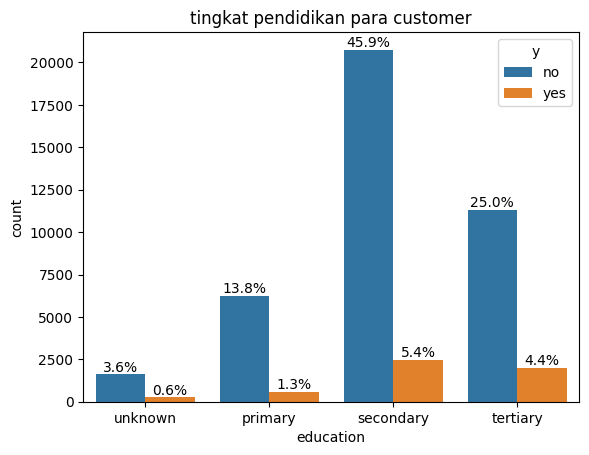

In [33]:
education_order = ['unknown', 'primary', 'secondary', 'tertiary']
total_data = len(df['education'])
ax = sns.countplot(data = df, x = 'education', order = education_order, hue = 'y')
plt.title("tingkat pendidikan para customer")

for i in ax.patches:
  percentage = '{:.1f}%'.format(100 * i.get_height() / total_data)
  x = i.get_x() + i.get_width() / 2
  y = i.get_height()
  ax.annotate(percentage, (x,y), ha = 'center', va = 'bottom')

ternyata customer yang diberikan campaign kebanyakan memiliki jenjang pendidikan terakhir SMA, dan Kuliah.\
dan juga customer yang berasal dari jenjang pendidikan SMA dan kuliah yang paling banyak melakukan deposit

In [ ]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

banyak sekali customer yang tidak terindikasi gagal bayar

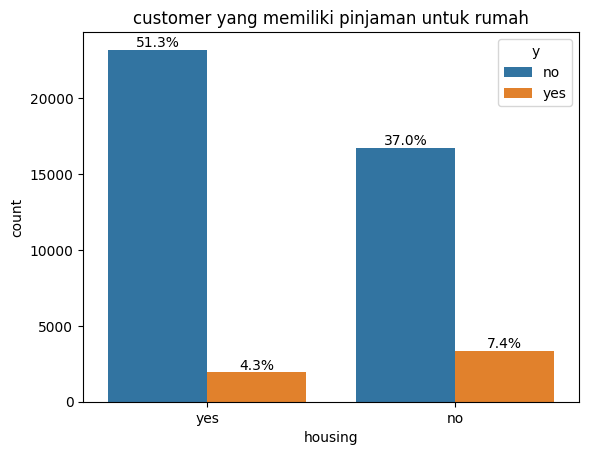

In [39]:
total_data = len(df['housing'])
ax = sns.countplot(data = df, x = 'housing', hue = 'y')
plt.title("customer yang memiliki pinjaman untuk rumah")
# plt.ylim(18000,26000)

for i in ax.patches:
  percentage = '{:.1f}%'.format(100 * i.get_height() / total_data)
  x = i.get_x() + i.get_width() / 2
  y = i.get_height()
  ax.annotate(percentage, (x,y), ha = 'center', va = 'bottom')

dari visualisasi tersebut terlihat lebih banyak customer yang memiliki pinjaman untuk rumah, perbedaan nya sebanyak 5000 customer antara yang memiliki pinjaman dengan yang tidak\
customer yang paling banyak melakukan deposito berasal dari customer yang tidak memiliki pinjaman rumah

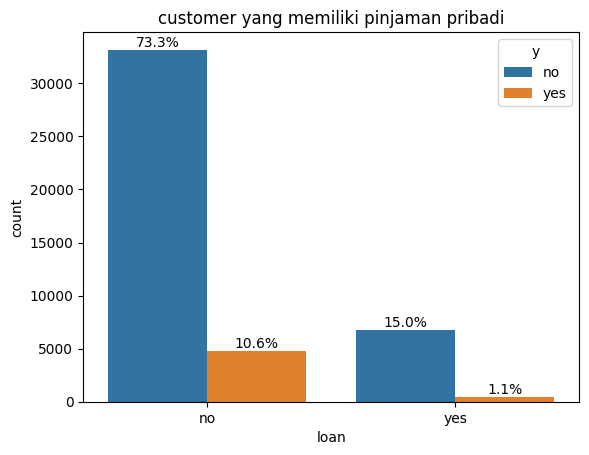

In [38]:
total_data = len(df['loan'])
ax = sns.countplot(x = 'loan', data = df, hue = 'y')
plt.title("customer yang memiliki pinjaman pribadi")

for i in ax.patches:
  percentage = '{:.1f}%'.format(100 * i.get_height() / total_data)
  x = i.get_x() + i.get_width() / 2
  y = i.get_height()
  ax.annotate(percentage, (x,y), ha = 'center', va = 'bottom')

tidak banyak customer yang memiliki pinjaman pribadi, mungkin karena sudah memiliki cicilan rumah\
mayoritas customer yang melakukan deposit adalah customer yang tidak memiliki pinjaman pribadi

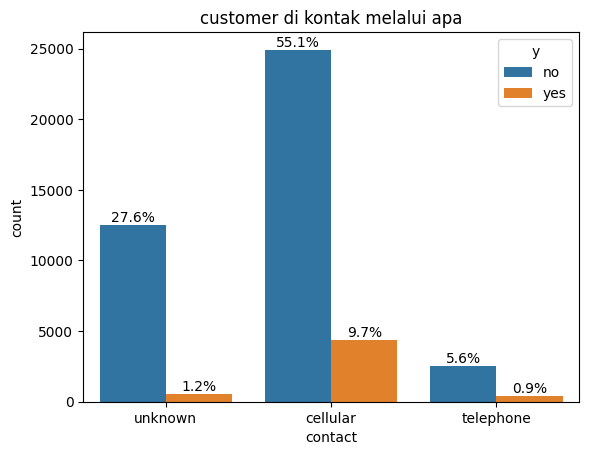

In [40]:
total_data = len(df['contact'])
ax = sns.countplot(x = 'contact', data = df, hue = 'y')
plt.title("customer di kontak melalui apa")
for i in ax.patches:
  percentage = '{:.1f}%'.format(100 * i.get_height() / total_data)
  x = i.get_x() + i.get_width() / 2
  y = i.get_height()
  ax.annotate(percentage, (x,y), ha = 'center', va = 'bottom')

kebanyakan customer di hubungi melalui telepon selular dan juga kebanyakan customer yang melakukan deposit adalah customer yang di hubungi melalui telepon

In [42]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

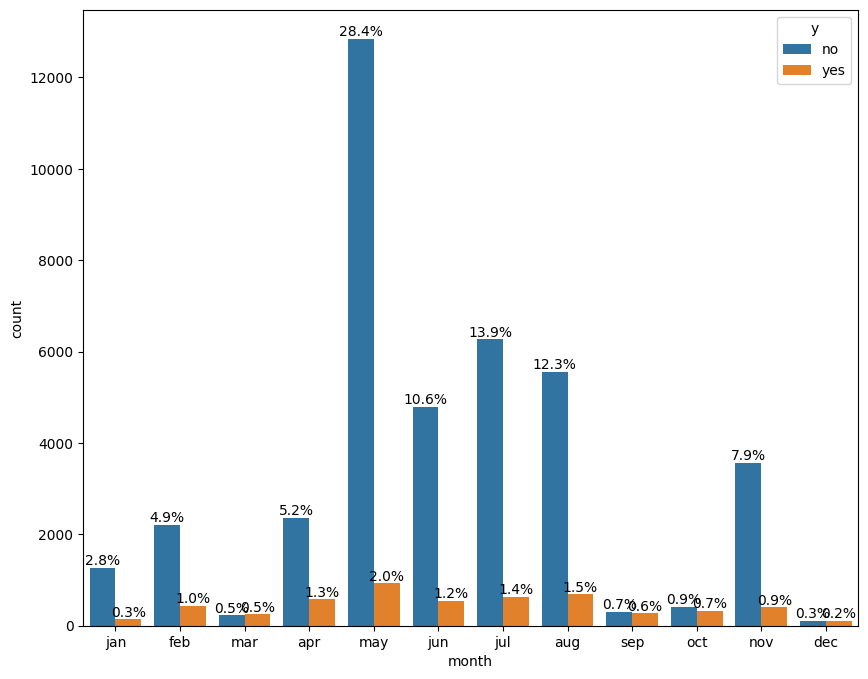

In [44]:
plt.figure(figsize = (10, 8))
total_data = len(df['month'])
sort_value = df['month'].value_counts()
ax = sns.countplot(x = 'month', data = df, order = month_order, hue = 'y')
for i in ax.patches:
  percentage = '{:.1f}%'.format(100 * i.get_height() / total_data)
  x = i.get_x() + i.get_width() / 2
  y = i.get_height()
  ax.annotate(percentage, (x,y), ha = 'center', va = 'bottom')

ternyata dalam setahun, customer banyak di hubungi di bulan may

**pertanyaan : di bulan apa customer memutuskan untuk melakukan deposit?**

**coba cari referensi lain ini data untuk bank di negara apa, dan di negara itu setiap bulan may terjadi apa**

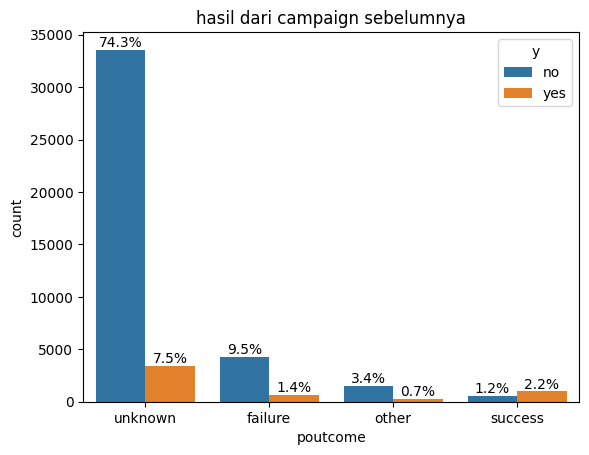

In [45]:
total_data = len(df['poutcome'])
ax = sns.countplot(x = 'poutcome', data = df, hue = 'y')
plt.title("hasil dari campaign sebelumnya")

for i in ax.patches:
  percentage = '{:.1f}%'.format(100 * i.get_height() / total_data)
  x = i.get_x() + i.get_width() / 2
  y = i.get_height()
  ax.annotate(percentage, (x,y), ha = 'center', va = 'bottom')

dan hasil dari campaign sebelumnya kita mendapati success rate yang sangat kecil, lebih banyak yang statusnya tidak di ketahui.\
artinya mungkin banyak orang yang setelah dihubungi langsung di abaikan begitu saja dengan kata lain mereka tidak tertarik\
tetapi ternyata customer yang statusnya tidak di ketahui menjadi customer yang paling banyak melakukan deposito

**pertanyaan : apa penyebab mereka tidak terdefinisi?**